<a href="https://colab.research.google.com/github/Annu2727/Attribute_classify/blob/main/Attribute_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
import yaml
from sklearn.metrics import accuracy_score

In [4]:
import gdown

In [5]:
import zipfile
from PIL import Image
import io
import cv2

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

images_path = '/content/drive/MyDrive/train_images.zip'
train_path = '/content/drive/MyDrive/train.csv'
test_path = '/content/drive/MyDrive/test.csv'
images_test_path = '/content/drive/MyDrive/test_images.zip'

In [8]:
import zipfile
import os

# Define the path to the zip file

extract_folder = 'train_images'  # Folder to extract to

# Create a directory to extract the files if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(images_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Extracted files to {extract_folder}")


Extracted files to train_images


In [9]:
# List the files in the extracted folder
extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)


Extracted files: ['021002.jpg', '029828.jpg', '035189.jpg', '001636.jpg', '011378.jpg', '043252.jpg', '024560.jpg', '069667.jpg', '026948.jpg', '047904.jpg', '067303.jpg', '067069.jpg', '014827.jpg', '059834.jpg', '038929.jpg', '037077.jpg', '024795.jpg', '045286.jpg', '020451.jpg', '022711.jpg', '044864.jpg', '016740.jpg', '054877.jpg', '020239.jpg', '021772.jpg', '014070.jpg', '049081.jpg', '011532.jpg', '020916.jpg', '023988.jpg', '065826.jpg', '015886.jpg', '068790.jpg', '009704.jpg', '028981.jpg', '050817.jpg', '023671.jpg', '064245.jpg', '008175.jpg', '055033.jpg', '046011.jpg', '026716.jpg', '066428.jpg', '002638.jpg', '042045.jpg', '048083.jpg', '020558.jpg', '068270.jpg', '025987.jpg', '069258.jpg', '052580.jpg', '024083.jpg', '033868.jpg', '008772.jpg', '047273.jpg', '042722.jpg', '023395.jpg', '058745.jpg', '068128.jpg', '054627.jpg', '029742.jpg', '047067.jpg', '011382.jpg', '008719.jpg', '013721.jpg', '051729.jpg', '008790.jpg', '057512.jpg', '043000.jpg', '058953.jpg', '0

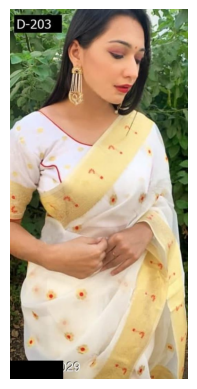

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display an image from the extracted files
image_path = os.path.join(extract_folder, extracted_files[0])  # Load the first image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


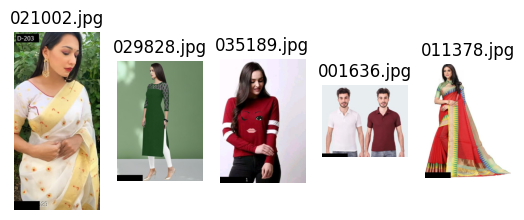

In [11]:
import matplotlib.pyplot as plt

image_folder = 'train_images'


# Loop through and display a few images
for i, filename in enumerate(os.listdir(image_folder)):
    if i < 5:  # Display the first 5 images
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)

        plt.subplot(1, 5, i + 1)  # Create a subplot
        plt.imshow(image)
        plt.axis('off')  # Turn off axis labels
        plt.title(filename)
    else:
        break

plt.show()

In [16]:
from ultralytics import YOLO

In [15]:

# Load the YOLOv5 model (here we are using 'yolov5s' - small version)

import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-21 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [24]:
 from google.colab.patches import cv2_imshow

In [27]:
image_path_single = '/content/train_first.jpg'
image = cv2.imread(image_path_single)


# Perform YOLO inference on the image
results = model(image)

# Draw bounding boxes on the image

# Display the image
cv2.imshow(image)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [23]:
# Function to crop bounding boxes from images
def crop_boxes(image, boxes):
    cropped_images = []
    for box in boxes:
        x_min, y_min, x_max, y_max = map(int, box)
        cropped_image = image[y_min:y_max, x_min:x_max]  # Crop image
        cropped_images.append(cropped_image)
    return cropped_images

# Crop regions of interest
cropped_images = crop_boxes(image, boxes)

NameError: name 'boxes' is not defined

In [ ]:
# YOLO inference (replace with actual prediction results)
boxes = [[50, 60, 200, 300], [120, 150, 400, 500]]  # Example bounding boxes [x_min, y_min, x_max, y_max]

# Draw bounding boxes on the image
for box in boxes:
    x_min, y_min, x_max, y_max = box
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# Show the image with bounding boxes
cv2.imshow('Image with Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Resize the image to match YOLO input size (e.g., 640x640)
resized_image = cv2.resize(image, (640, 640))

# Normalize the image
normalized_image = resized_image / 255.0


In [ ]:
def crop_save_clothing(img_path,output_dir,img_name):
    img=cv2.imread(img_path)
    r1=model(img)
    person_boxes = []
    for detection in r1.xyxy[0]:
        x1, y1, x2, y2, confidence, class_id = detection
        if class_id == 0:
            person_boxes.append((int(x1), int(y1), int(x2), int(y2)))

    x_min = min([box[0] for box in person_boxes])
    y_min = min([box[1] for box in person_boxes])
    x_max = max([box[2] for box in person_boxes])
    y_max = max([box[3] for box in person_boxes])
    cropped_image = img[y_min:y_max, x_min:x_max]
    output_path = os.path.join(output_dir, f"{image_name}.jpg")
    cropped_img.save(output_path)
    print(f"Saved cropped image: {output_path}")

In [ ]:
input_dir = "path_to_your_dataset"  # Directory with the original images yaha dirn edit karni hain
output_dir = "path_to_save_cropped_images"  # Directory to save cropped images yaha direction edit karni hain

os.makedirs(output_dir, exist_ok=True)

for image_file in os.listdir(input_dir):
    if image_file.endswith((".jpg", ".png", ".jpeg")):
        image_path = os.path.join(input_dir, image_file)
        image_name = os.path.splitext(image_file)[0]
        crop_save_clothing(image_path, output_dir, image_name)



#yaha tak hum na sari photos crop kar li aur dusara folder main bhi daal li model ko train karna ka liya

In [ ]:
# Load ViT for image classification
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

# Preprocess cropped images for ViT
def preprocess_image(image):
    img_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to PIL Image
    inputs = feature_extractor(images=img_pil, return_tensors="pt")
    return inputs

# Classify each cropped image using Vision Transformer
predicted_labels = []
for cropped_img in cropped_images:
    inputs = preprocess_image(cropped_img)
    outputs = vit_model(**inputs)
    predicted_labels.append(outputs.logits.argmax(-1).item())

print(f'Predicted labels for cropped regions: {predicted_labels}')


In [ ]:
import torch.nn as nn

# Define a custom classifier with multiple heads (e.g., for color, type, and pattern)
class MultiHeadViT(nn.Module):
    def __init__(self, base_model, num_attr_1,num_attr_2,num_attr_3,num_attr_4,num_attr_5,num_attr_6,num_attr_7,num_attr_8,num_attr_9,num_attr_10, num_categories, embedding_dim=16):
        super(MultiHeadViT, self).__init__()
        self.vit = base_model.vit  # Extract the Vision Transformer backbone
        self.category_embedding = nn.Embedding(num_categories, embedding_dim)
        self.classifier_attr_1 = nn.Linear(base_model.classifier.in_features, num_attr_1)
        self.classifier_attr_2 = nn.Linear(base_model.classifier.in_features, num_attr_2)
        self.classifier_attr_3 = nn.Linear(base_model.classifier.in_features, num_attr_3)
        self.classifier_attr_4 = nn.Linear(base_model.classifier.in_features, num_attr_4)
        self.classifier_attr_5 = nn.Linear(base_model.classifier.in_features, num_attr_5)
        self.classifier_attr_6 = nn.Linear(base_model.classifier.in_features, num_attr_6)
        self.classifier_attr_7 = nn.Linear(base_model.classifier.in_features, num_attr_7)
        self.classifier_attr_8 = nn.Linear(base_model.classifier.in_features, num_attr_8)
        self.classifier_attr_9 = nn.Linear(base_model.classifier.in_features, num_attr_9)
        self.classifier_attr_10 = nn.Linear(base_model.classifier.in_features, num_attr_10)

    def forward(self, x, category):
        x = self.vit(x)  # Pass through the ViT backbone
        x = x.last_hidden_state[:, 0, :]  # Get the [CLS] token

        # Embed the category input
        category_embedded = self.category_embedding(category)  # Shape: (batch_size, embedding_dim)

        # Concatenate the category embedding with the image features
        x = torch.cat([x, category_embedded], dim=1)  # Concatenate along feature dimension

        # Multi-task heads for classification
        out_attr_1 = self.classifier_attr_1(x)
        out_attr_2 = self.classifier_attr_2(x)
        out_attr_3 = self.classifier_attr_3(x)
        out_attr_4 = self.classifier_attr_4(x)
        out_attr_5 = self.classifier_attr_5(x)
        out_attr_6 = self.classifier_attr_6(x)
        out_attr_7 = self.classifier_attr_7(x)
        out_attr_8 = self.classifier_attr_8(x)
        out_attr_9 = self.classifier_attr_9(x)
        out_attr_10 = self.classifier_attr_10(x)

        return out_attr_1,out_attr_2,out_attr_3,out_attr_4,out_attr_5,out_attr_6,out_attr_7,out_attr_8,out_attr_9,out_attr_10

# Example: number of classes for each attribute
num_attr_1 = 19
num_attr_2 = 15
num_attr_3 = 11
num_attr_4 = 20
num_attr_5 = 15
num_attr_6 = 8
num_attr_7 = 12
num_attr_8 = 11
num_attr_9 = 14
num_attr_10 = 9

categories_map = {
    'Men Tshirts': 0,
    'Kurtis': 1,
    'Women Tops & Tunics' : 2,
    'Women Tshirts' : 3,
    'Sarees' : 4
}
num_categories = len(categories_map)
# Create the multi-head ViT model
multi_head_model = MultiHeadViT(vit_model, num_attr_1,num_attr_2,num_attr_3,num_attr_4,num_attr_5,num_attr_6,num_attr_7,num_attr_8,num_attr_9,num_attr_10, num_categories)

In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd

class ClothingDataset(Dataset):
    def __init__(self, excel_file, image_folder, feature_extractor, categories_map):
        # Load Excel file
        self.data = pd.read_excel(excel_file)

        # Store the image folder and feature extractor
        self.image_folder = image_folder
        self.feature_extractor = feature_extractor

        # Store the category mapping (string -> integer)
        self.categories_map = categories_map

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get the serial number and labels (color, type, pattern, category) from the Excel file
        row = self.data.iloc[idx]
        serial_number = row['id']
        attr_1_label = row['attr_1']
        attr_2_label = row['attr_2']
        attr_3_label = row['attr_3']
        attr_4_label = row['attr_4']
        attr_5_label = row['attr_5']
        attr_6_label = row['attr_6']
        attr_7_label = row['attr_7']
        attr_8_label = row['attr_8']
        attr_9_label = row['attr_9']
        attr_10_label = row['attr_10']
        category = row['Category']

        # Convert the serial number to a zero-padded string (6 digits)
        padded_serial_number = f"{serial_number:06d}"  # Formats the number as a 6-digit string with leading zeros

        # Construct the image path using the padded serial number
        image_path = os.path.join(self.image_folder, f"{padded_serial_number}.jpg")  # Adjust file extension if needed

        # Load image
        image = Image.open(image_path).convert("RGB")

        # Extract features from image
        inputs = self.feature_extractor(images=image, return_tensors="pt")
        pixel_values = inputs['pixel_values'].squeeze()  # Remove batch dimension

        # Convert the category into a numeric value using the category map
        category_label = self.categories_map[category]  # Category to integer mapping

        return {
            'pixel_values': pixel_values,
            'category_label': torch.tensor(category_label, dtype=torch.long),  # Category as input
            'labels_attr_1': torch.tensor(attr_1_label, dtype=torch.long),
            'labels_attr_2': torch.tensor(attr_2_label, dtype=torch.long),
            'labels_attr_3': torch.tensor(attr_3_label, dtype=torch.long),
            'labels_attr_4': torch.tensor(attr_4_label, dtype=torch.long),
            'labels_attr_5': torch.tensor(attr_5_label, dtype=torch.long),
            'labels_attr_6': torch.tensor(attr_6_label, dtype=torch.long),
            'labels_attr_7': torch.tensor(attr_7_label, dtype=torch.long),
            'labels_attr_8': torch.tensor(attr_8_label, dtype=torch.long),
            'labels_attr_9': torch.tensor(attr_9_label, dtype=torch.long),
            'labels_attr_10': torch.tensor(attr_10_label, dtype=torch.long)
        }

# Example usage
excel_file = "path_to_excel_file.xlsx"  # Path to your Excel file yaha ecel file ka adress add karna hain
image_folder = "path_to_image_folder"  # Folder containing images yaha adress add karna hain jo naya folder banya hian ya wahi same varable add kar do



# Instantiate dataset and dataloader
dataset = ClothingDataset(excel_file, image_folder, feature_extractor, categories_map)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [ ]:
#traing loop
import torch.optim as optim

# Define loss functions for each task
criterion_attr_1 = nn.CrossEntropyLoss()
criterion_attr_2 = nn.CrossEntropyLoss()
criterion_attr_3 = nn.CrossEntropyLoss()
criterion_attr_4 = nn.CrossEntropyLoss()
criterion_attr_5 = nn.CrossEntropyLoss()
criterion_attr_6 = nn.CrossEntropyLoss()
criterion_attr_7 = nn.CrossEntropyLoss()
criterion_attr_8 = nn.CrossEntropyLoss()
criterion_attr_9 = nn.CrossEntropyLoss()
criterion_attr_10 = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(multi_head_model.parameters(), lr=1e-4)

# Training loop
def train_model(model, dataloader, optimizer, epochs=5):
    model.train()  # Set model to training mode

    for epoch in range(epochs):
        running_loss = 0.0

        for batch in dataloader:
            pixel_values = batch['pixel_values']
            category_label = batch['category_label']
            labels_attr_1 = batch['labels_attr_1']
            labels_attr_2 = batch['labels_attr_2']
            labels_attr_3 = batch['labels_attr_3']
            labels_attr_4 = batch['labels_attr_4']
            labels_attr_5 = batch['labels_attr_5']
            labels_attr_6 = batch['labels_attr_6']
            labels_attr_7 = batch['labels_attr_7']
            labels_attr_8 = batch['labels_attr_8']
            labels_attr_9 = batch['labels_attr_9']
            labels_attr_10 = batch['labels_attr_10']

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            out_attr_1,out_attr_2,out_attr_3,out_attr_4,out_attr_5,out_attr_6,out_attr_7,out_attr_8,out_attr_9,out_attr_10 = multi_head_model(pixel_values, category_label)

            # Calculate the losses for each task
            loss_attr_1 = criterion_color(out_attr_1, labels_attr_1)
            loss_attr_2 = criterion_type(out_attr_2, labels_attr_2)
            loss_attr_3 = criterion_pattern(out_attr_3, labels_attr_3)
            loss_attr_4 = criterion_pattern(out_attr_4, labels_attr_4)
            loss_attr_5 = criterion_pattern(out_attr_5, labels_attr_5)
            loss_attr_6 = criterion_pattern(out_attr_6, labels_attr_6)
            loss_attr_7 = criterion_pattern(out_attr_7, labels_attr_7)
            loss_attr_8 = criterion_pattern(out_attr_8, labels_attr_8)
            loss_attr_9 = criterion_pattern(out_attr_9, labels_attr_9)
            loss_attr_10 = criterion_pattern(out_attr_10, labels_attr_10)

            # Total loss (you can weight them differently if needed)
            total_loss = loss_attr_1 + loss_attr_2 + loss_attr_3 + loss_attr_4 + loss_attr_5 + loss_attr_6 + loss_attr_7 + loss_attr_8 + loss_attr_9 + loss_attr_10

            # Backward pass and optimization
            total_loss.backward()
            optimizer.step()

            running_loss += total_loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(dataloader)}")

In [ ]:
# Placeholder for true labels from test data (use actual test data)
true_labels = test_data['label']  # Replace with your actual label column

# Calculate accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')
